### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [4]:
min_qubits=2
max_qubits=6
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# *** If using IBMQ hardware, run this once to authenticate
from qiskit import IBMQ
IBMQ.save_account('0a99e0ac11bb99692b890b6083af67f9970b0a93760ff516f78ab16b8f69f2c4abac667de0f0f3bf82e82df8ae38ce7740e0e0fe7693a0f4d950d47e69ce0149')

# *** If you are part of an IBMQ group, set hub, group, and project name here
hub="ibm-q-research"
group="quantum-circ-1"
project="main"

# *** This example shows how to specify the backend using a known "backend_id"
# Use 'sabre' layout for IBM backends
exec_options = { "optimization_level":0, "layout_method":'sabre', "routing_method":'sabre',
                  "use_sessions":False, "resilience_level":1}
backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"


/tmp/ipykernel_67142/132511983.py:13: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('0a99e0ac11bb99692b890b6083af67f9970b0a93760ff516f78ab16b8f69f2c4abac667de0f0f3bf82e82df8ae38ce7740e0e0fe7693a0f4d950d47e69ce0149')
/tmp/ipykernel_67142/132511983.py:13: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('0a99e0ac11bb99692b890b6083af67f997

In [5]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Hydrogen Lattice - Method 1 - Fidelity of Ansatz

Hydrogen Lattice Benchmark Program - Qiskit
... execution starting at Aug 07, 2023 17:41:00 UTC
************
Executing [1] circuits for num_qubits = 2
************
Executing [1] circuits for num_qubits = 4
************
Executing [1] circuits for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 11, 0.118, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.296, 0.429, 0.044 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 1.0, 1.0

************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 11, 0.118, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.296, 0.429, 0.044 secs
Average Transpiling, Validating, Run

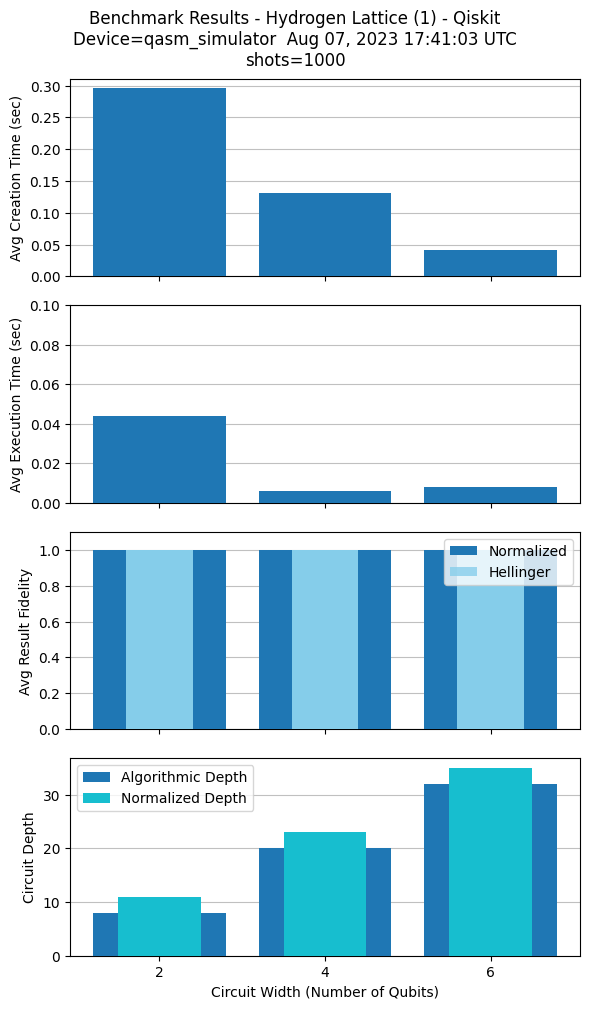

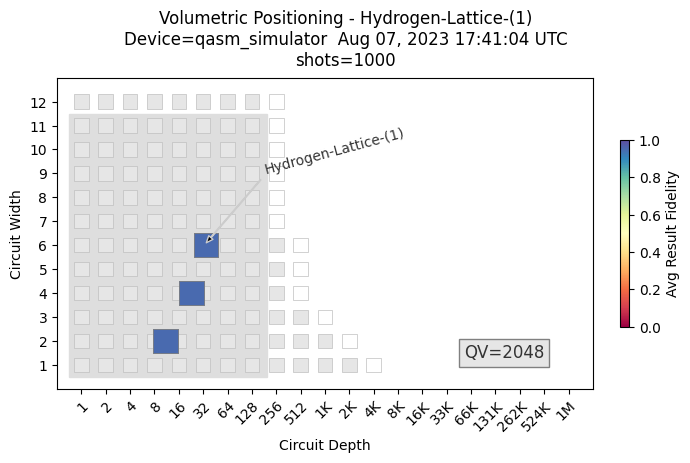

In [6]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hydrogen Lattice - Method 2 - Energy as Objective Function

Hydrogen Lattice Benchmark Program - Qiskit
... execution starting at Aug 07, 2023 17:41:16 UTC
************
Executing [1] restarts for num_qubits = 2

...............
Below Energies are for problem file h002_chain_000_75.json is for 2 qubits and radius 0.75 of paired hamiltionians
PUCCD calculated energy : -1.1110104483316843

Below Classical Energies are in solution file h002_chain_000_75.sol is 2 qubits and radius 0.75 of paired hamiltionians
DOCI calculated energy : -1.1371170673457325
FCI calculated energy : -1.1371170673457325
... saving data for width 2 radius None instance_num 1
  ... to file __data/qasm_simulator/width_2_instance_1.json
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 11, 0.118, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.013, 0.136, 0.011 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001,

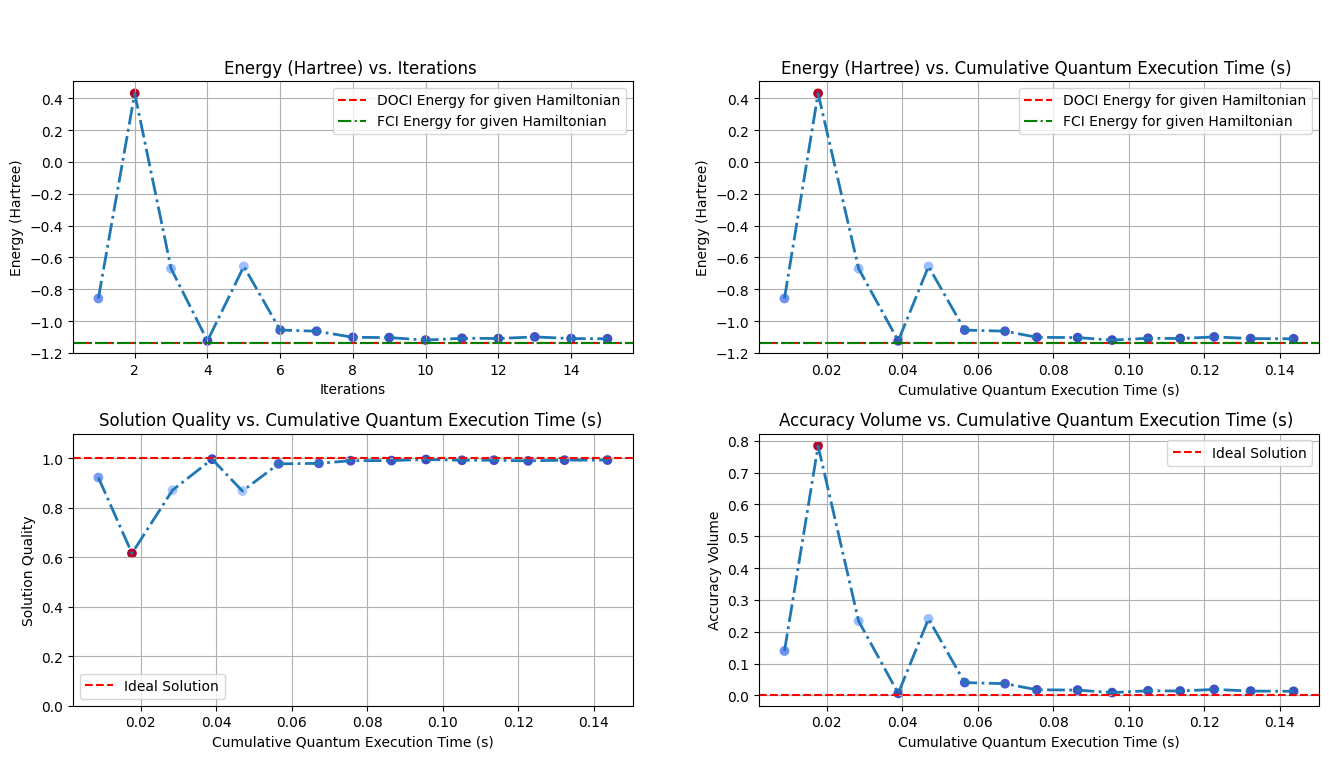

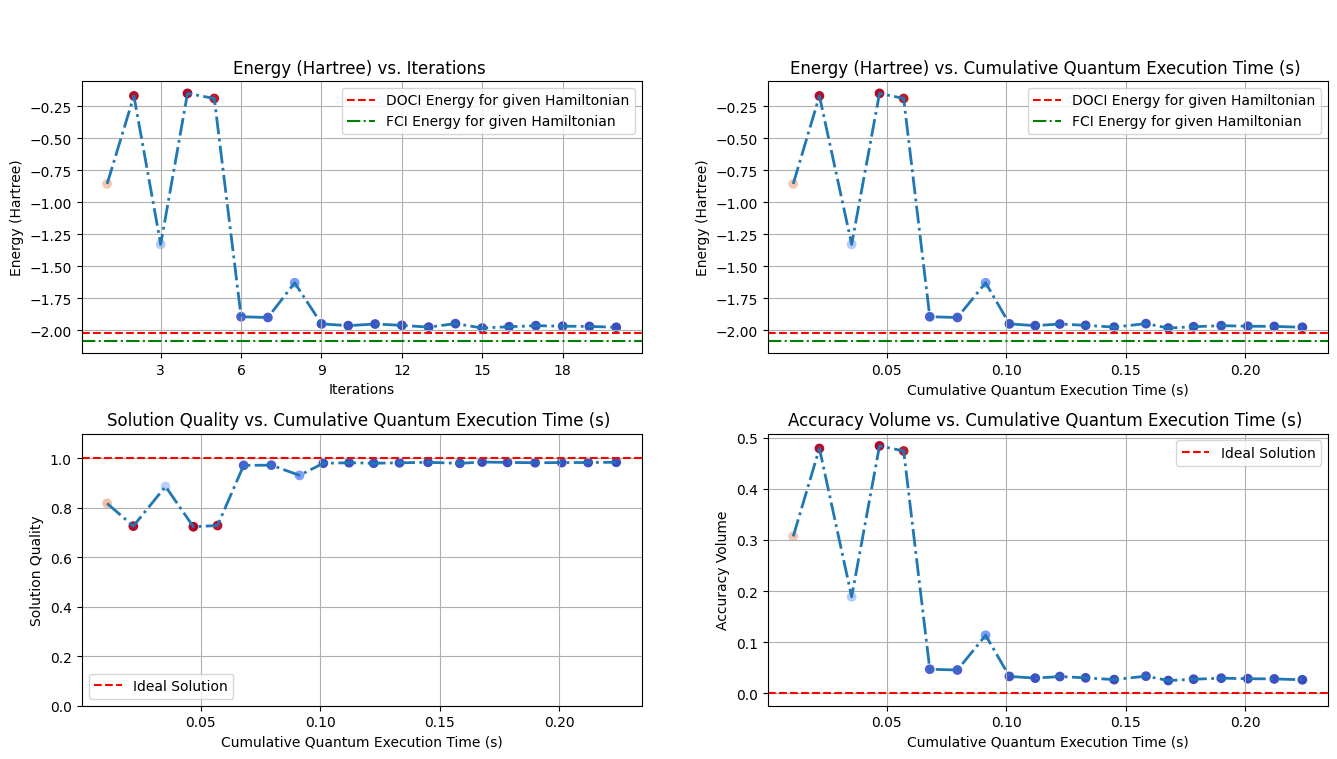

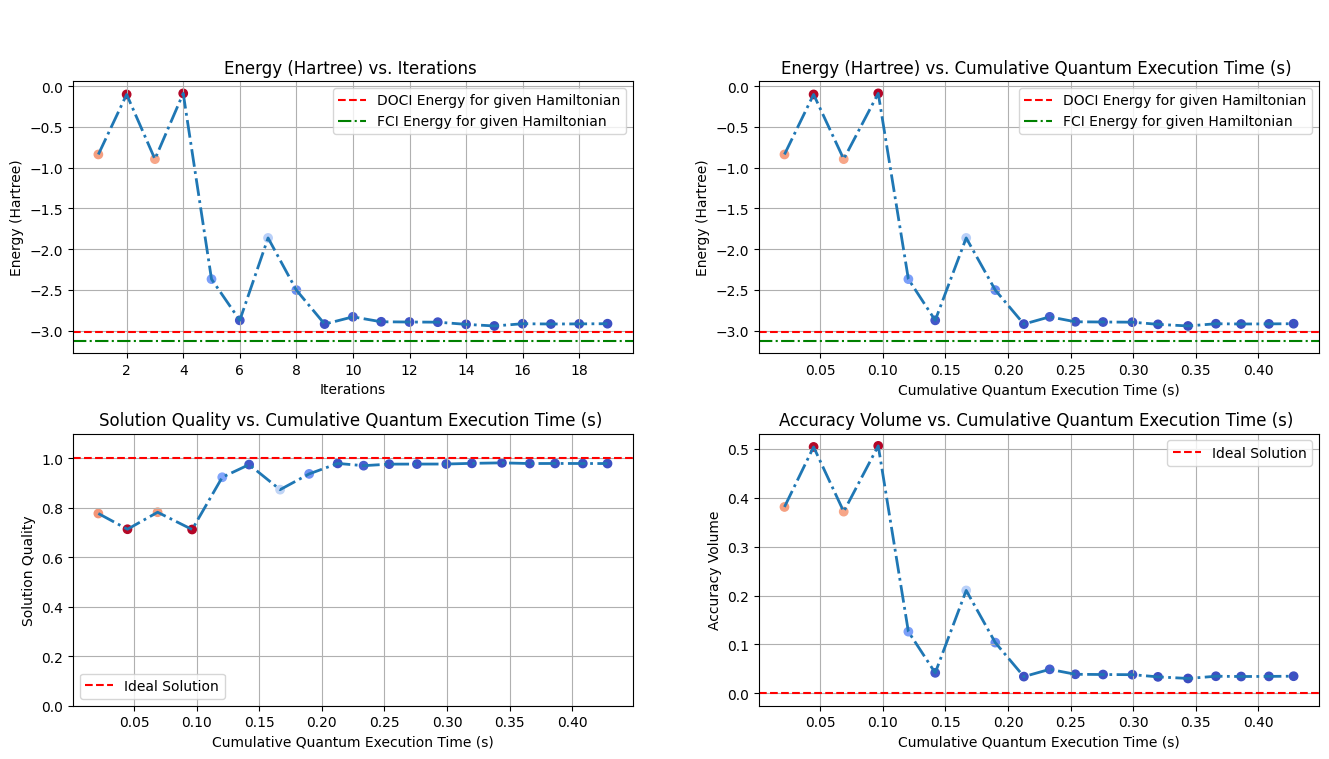

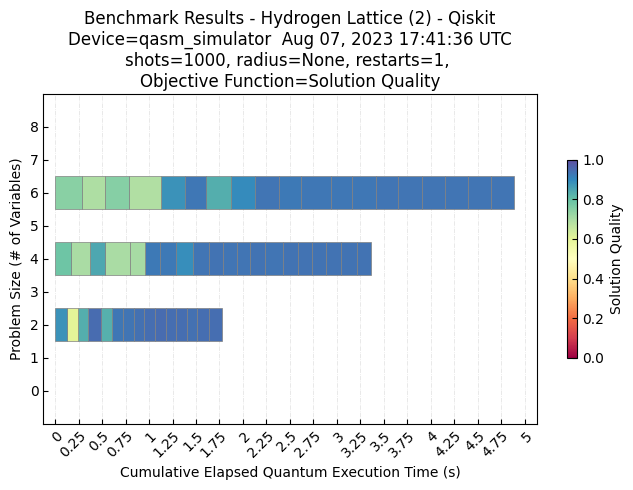

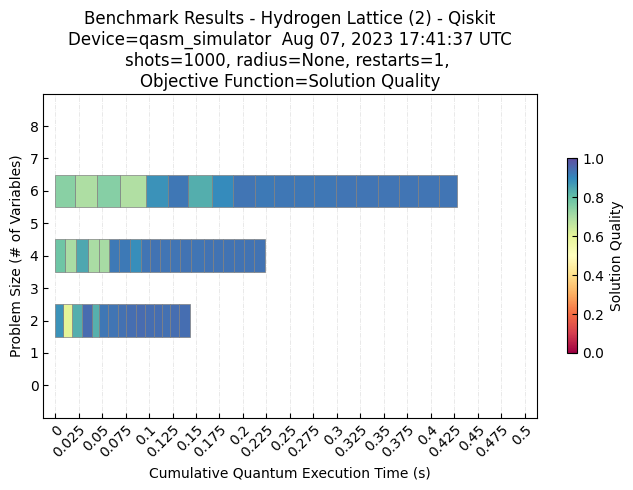

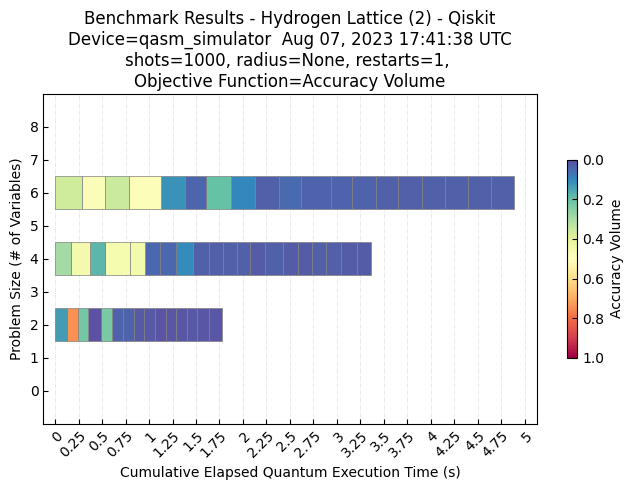

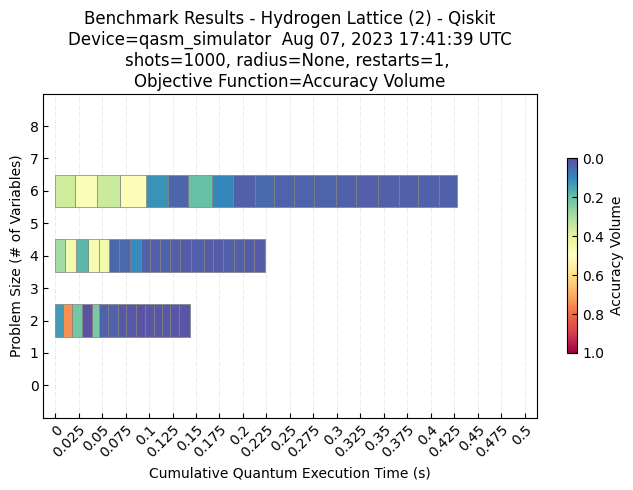

In [7]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# execute and display options
score_metric=['solution_quality', 'accuracy_volume']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time']

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, radius=None, do_fidelities=False, parameterized=False, max_iter=30,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True, comfort=True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

... set custom map style
... execution starting at Aug 06, 2023 01:18:04 UTC
['stash', 'width_2_instance_1.json', 'width_4_instance_1.json', 'width_6_instance_1.json']
Loading from width_2_instance_1.json, corresponding to 2 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 8, 0.182
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 11, 0.118, 2.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.035, 0.452, 0.021 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.0, 0.0

Loading from width_4_instance_1.json, corresponding to 4 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 20, 0.19
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 23, 0.148, 8.0
Average Creation, Elapsed, Execution Time for the 4 

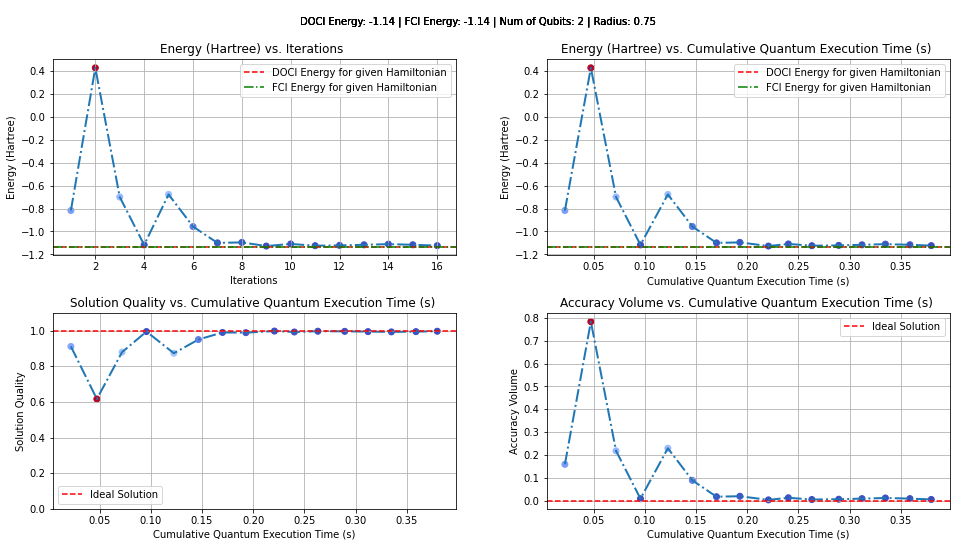

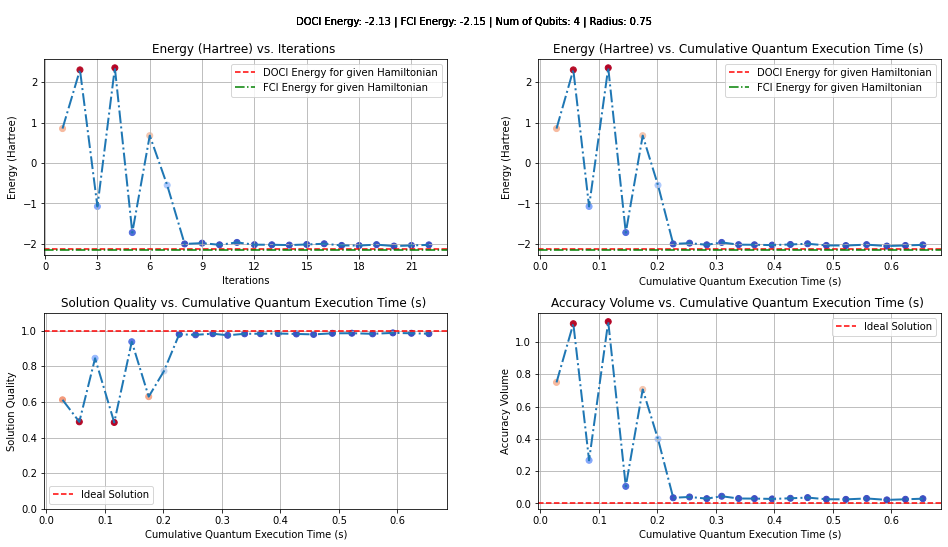

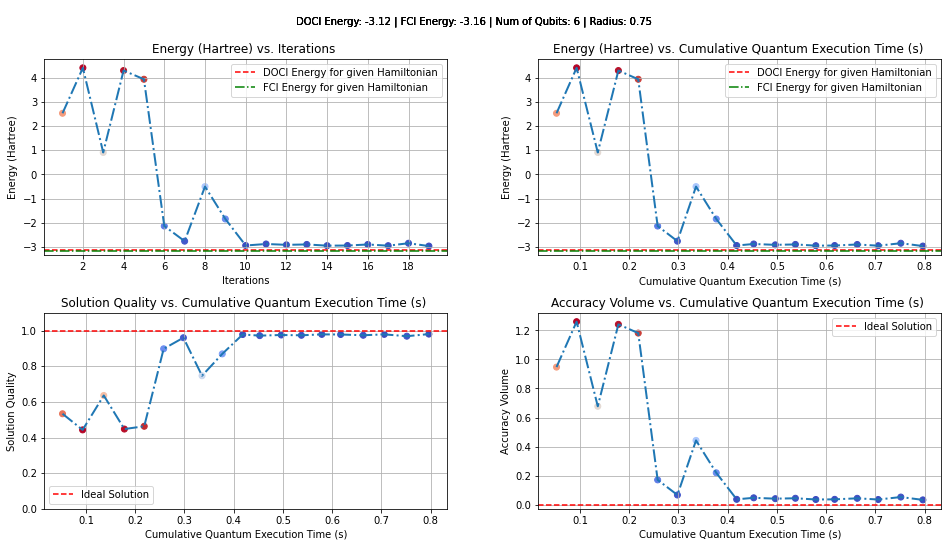

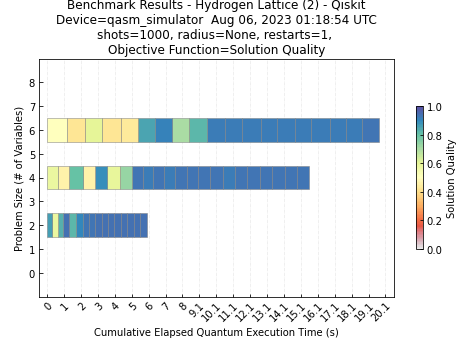

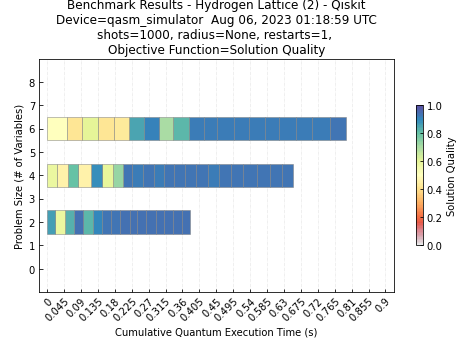

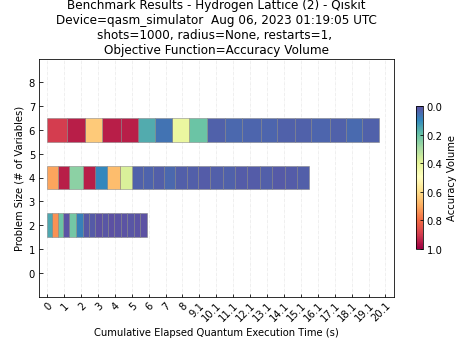

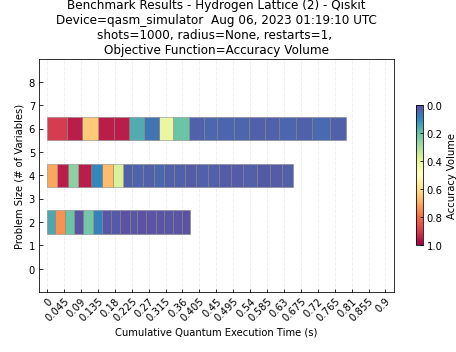

In [5]:
import os, hydrogen_lattice_benchmark

#  Custom color map settings; will be default later
import sys
# sys.path.insert(1, "../../_common")
import metrics
#metrics.cmap = metrics.cmap_blues
metrics.set_custom_cmap_style()

hydrogen_lattice_benchmark.load_data_and_plot(os.path.join('__data', backend_id, ''),                                             
                score_metric=['solution_quality', 'accuracy_volume'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time'])